## Module 6 : Project 1 (Regression for Numeric data)
#### Dengyi Lui, Xin Xiang, Yuchen Wang, Aishwarya Deshmane

### Introduction:

The dataset consists the information pertaining to NY State High School graduation metrics for the 2018-2019 school year. It has around 73,000 observations and 29 columns. The data is associated with subgroupings/categorizations of high school students enrolled for atleast 4 years as of the end of the 2018-19 school year

__Task:__
- To predict the number of students droping out of the school using provided information

__Approach to this study:__
- Exploratory data analysis
- Data Preparation
- Dimensionality reduction
- Regression models
- Conclusion

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
#Read the file
path = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/Project1_Data.csv"
data = pd.read_csv(path)

In [3]:
data

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


In [4]:
#check the shape
data.shape

(73152, 29)

In [5]:
#check sum of the null values
data.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

In [6]:
#check the datatypes of the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

There are no null values in the data as per info but if you look closely, you will find "-"(hyphen/dash) in the obervations. Few also has "%"(percentage) sign

That's the reason it says object datatype in the information for columns 12 to 28

Let's replace the "-" with 0 and "%" with nothing and convert it to numeric datatype. This would help us in Exploratory data analysis and building graphs

In [7]:
data.replace('-',0,inplace = True)
data = data.replace('%','',regex = True)

In [8]:
data

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14,16,2,30,5,0,0,148,22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15,2,1,11,3,0,0,65,20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13,14,4,19,6,0,0,83,25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,0,0,0,0,0,0,0,0,0,0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6,10,3,18,5,0,0,91,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#change the data-types of the cnt and pct columns from objects to numeric
data.iloc[:,12:29]= data.iloc[:,12:29].apply(pd.to_numeric)

In [10]:
data.iloc[:,12:29]

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658,464,71,63,10,310,47,91,14,16,2,30,5,0,0,148,22
1,324,246,76,30,9,169,52,47,15,2,1,11,3,0,0,65,20
2,334,218,65,33,10,141,42,44,13,14,4,19,6,0,0,83,25
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,367,248,68,42,11,183,50,23,6,10,3,18,5,0,0,91,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  int64 
 13  grad_cnt                    73152 non-null  in

In [12]:
#overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aggregation_index,73152.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
nrc_code,73152.0,4.588583,1.203507,1.0,4.0,5.0,5.0,6.0
county_code,73152.0,36.251859,20.588044,1.0,17.0,40.0,57.0,68.0
nyc_ind,73152.0,0.055255,0.228479,0.0,0.0,0.0,0.0,1.0
subgroup_code,73152.0,12.000930,7.213138,1.0,6.0,11.0,18.0,25.0
enroll_cnt,73152.0,104.196358,337.855150,0.0,0.0,9.0,76.0,9176.0
grad_cnt,73152.0,87.415108,277.925141,0.0,0.0,7.0,66.0,7540.0
grad_pct,73152.0,45.777942,43.608471,0.0,0.0,60.0,90.0,100.0
local_cnt,73152.0,6.693091,24.387913,0.0,0.0,0.0,4.0,557.0
local_pct,73152.0,4.599095,8.745939,0.0,0.0,0.0,6.0,100.0


### Exploratory data Analysis:

<AxesSubplot:>

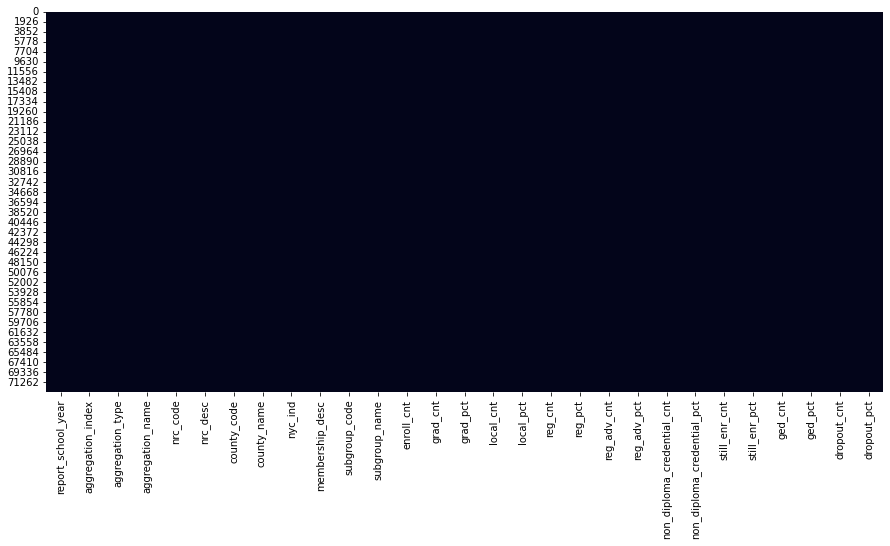

In [13]:
#see the distribution of the null values
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),cbar=False)

In [14]:
#check if any duplicated rows
data.duplicated().sum()

0

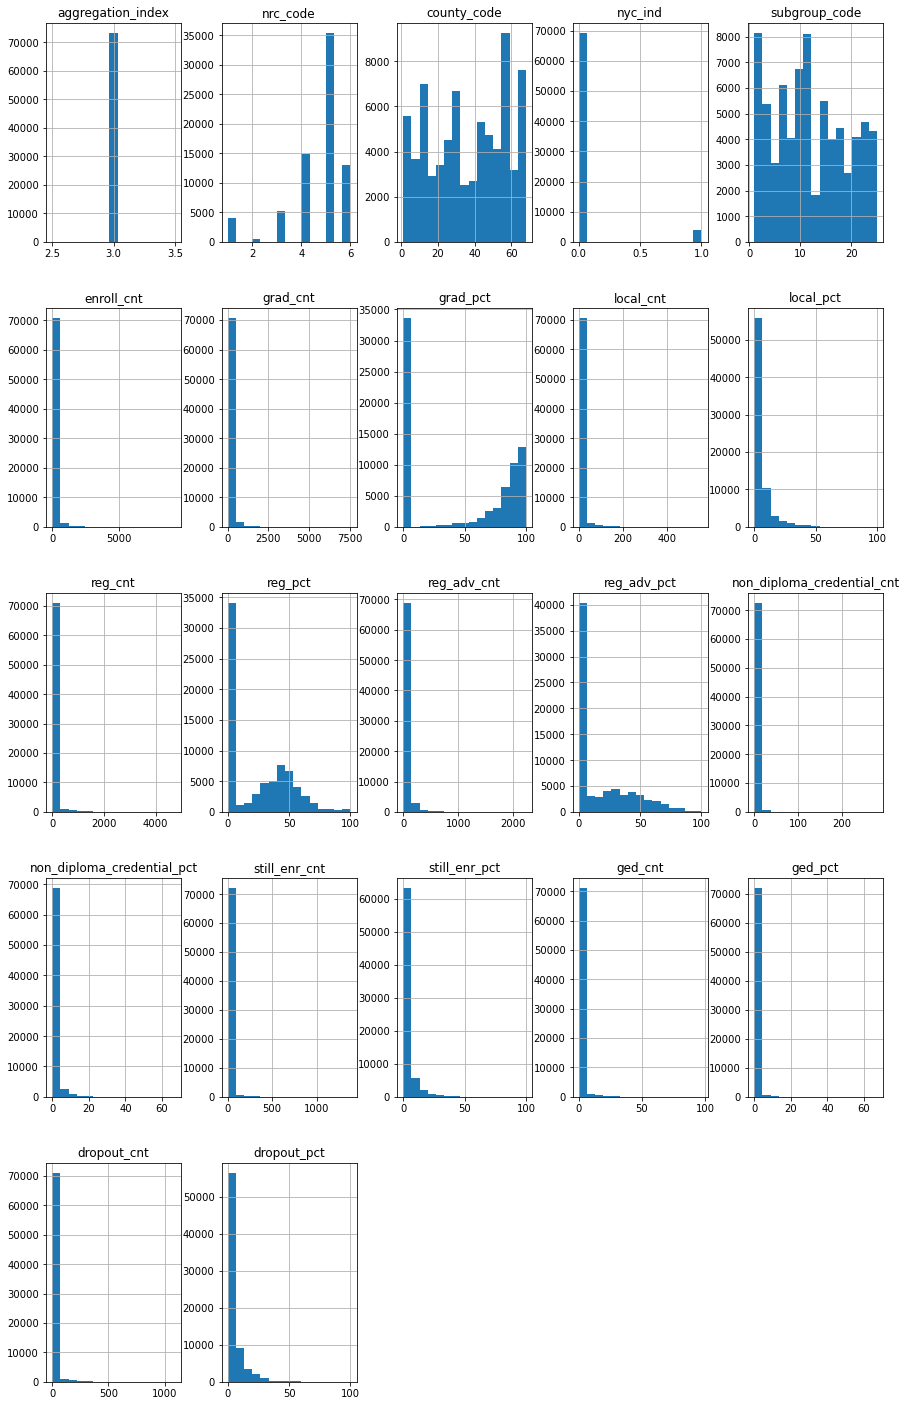

In [15]:
#plot the histograms for all the attributes and see how widely the data is distributed
data.hist(bins = 15,figsize=(15,25));

In [16]:
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

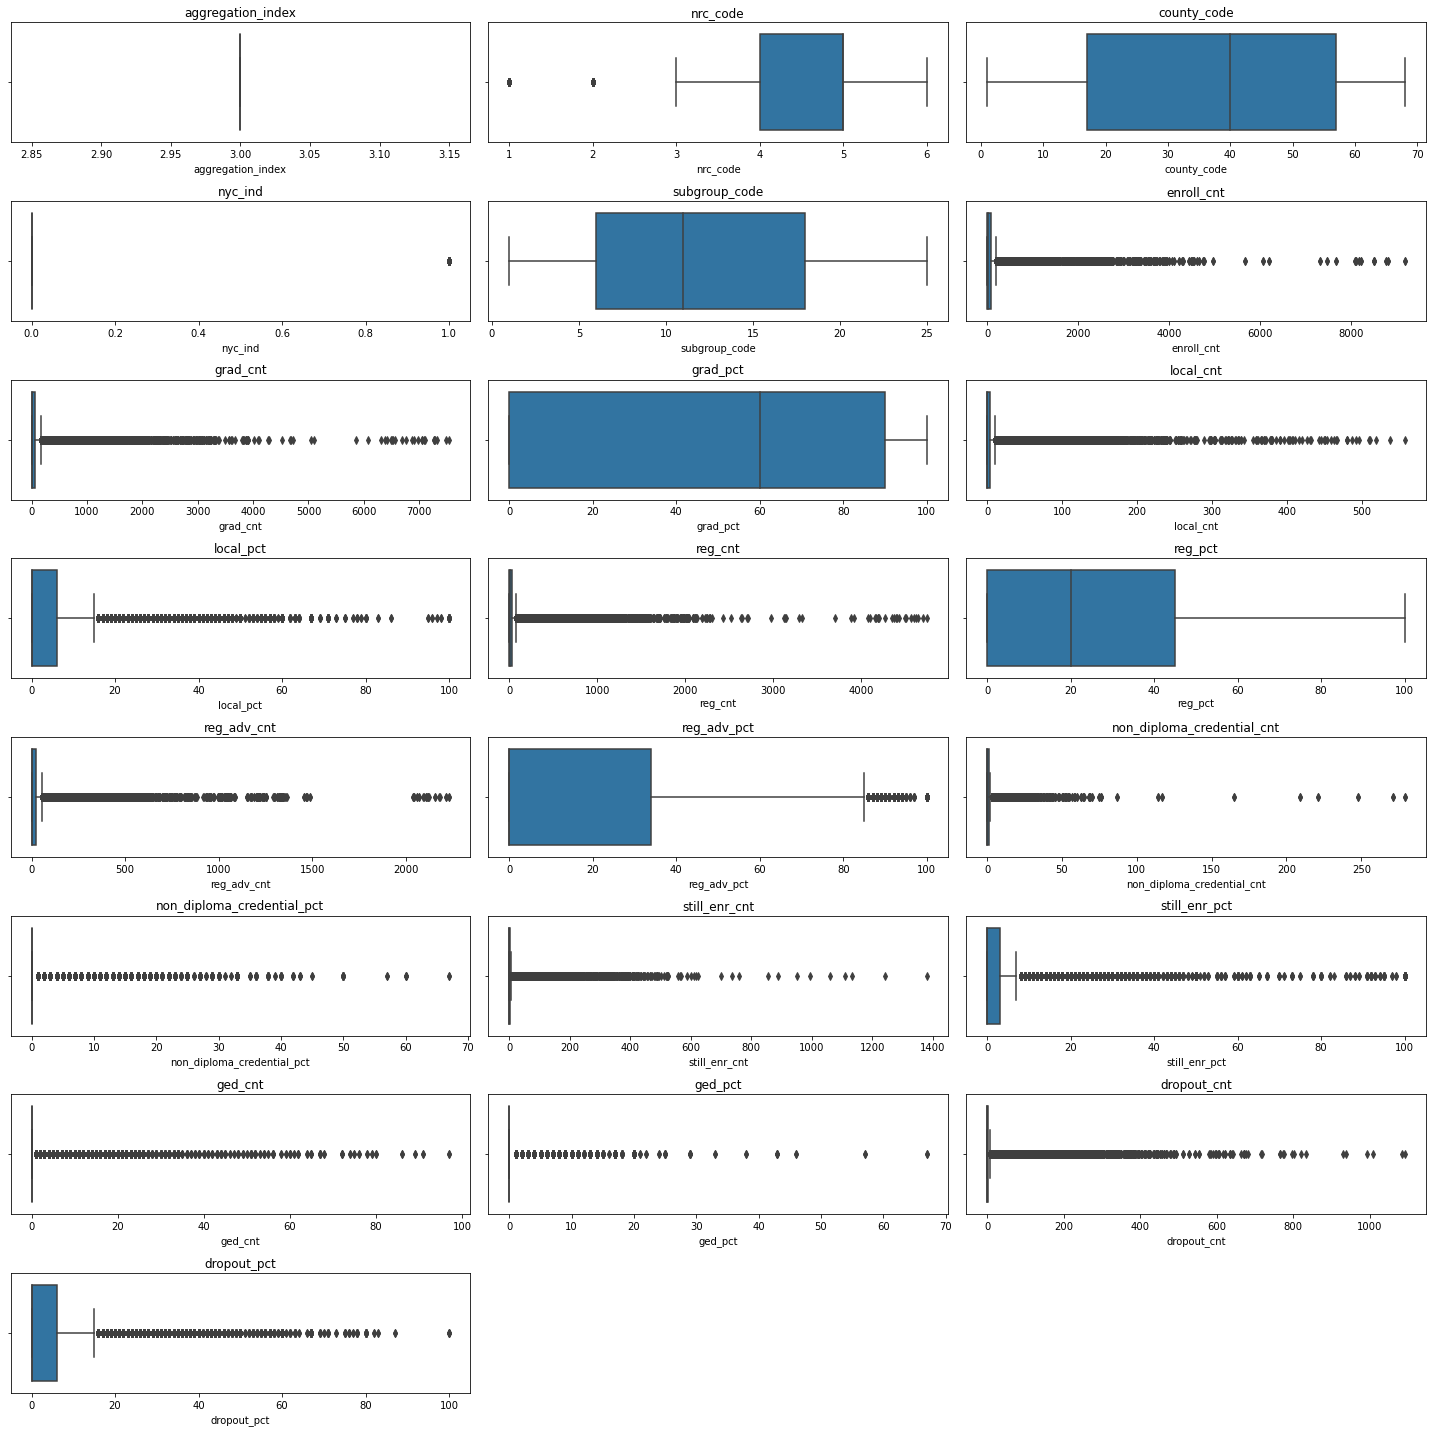

In [17]:
# This functions plots the boxplot of the data
 
plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.boxplot(data[col])
    plt.tight_layout()
    plt.title(col)

In the above box plots we can see that many data points lie outside the 4th quartile but these are not outliers. There is no specific range we can define to calculate the drop out counts and so we are not consider any observations as outliers

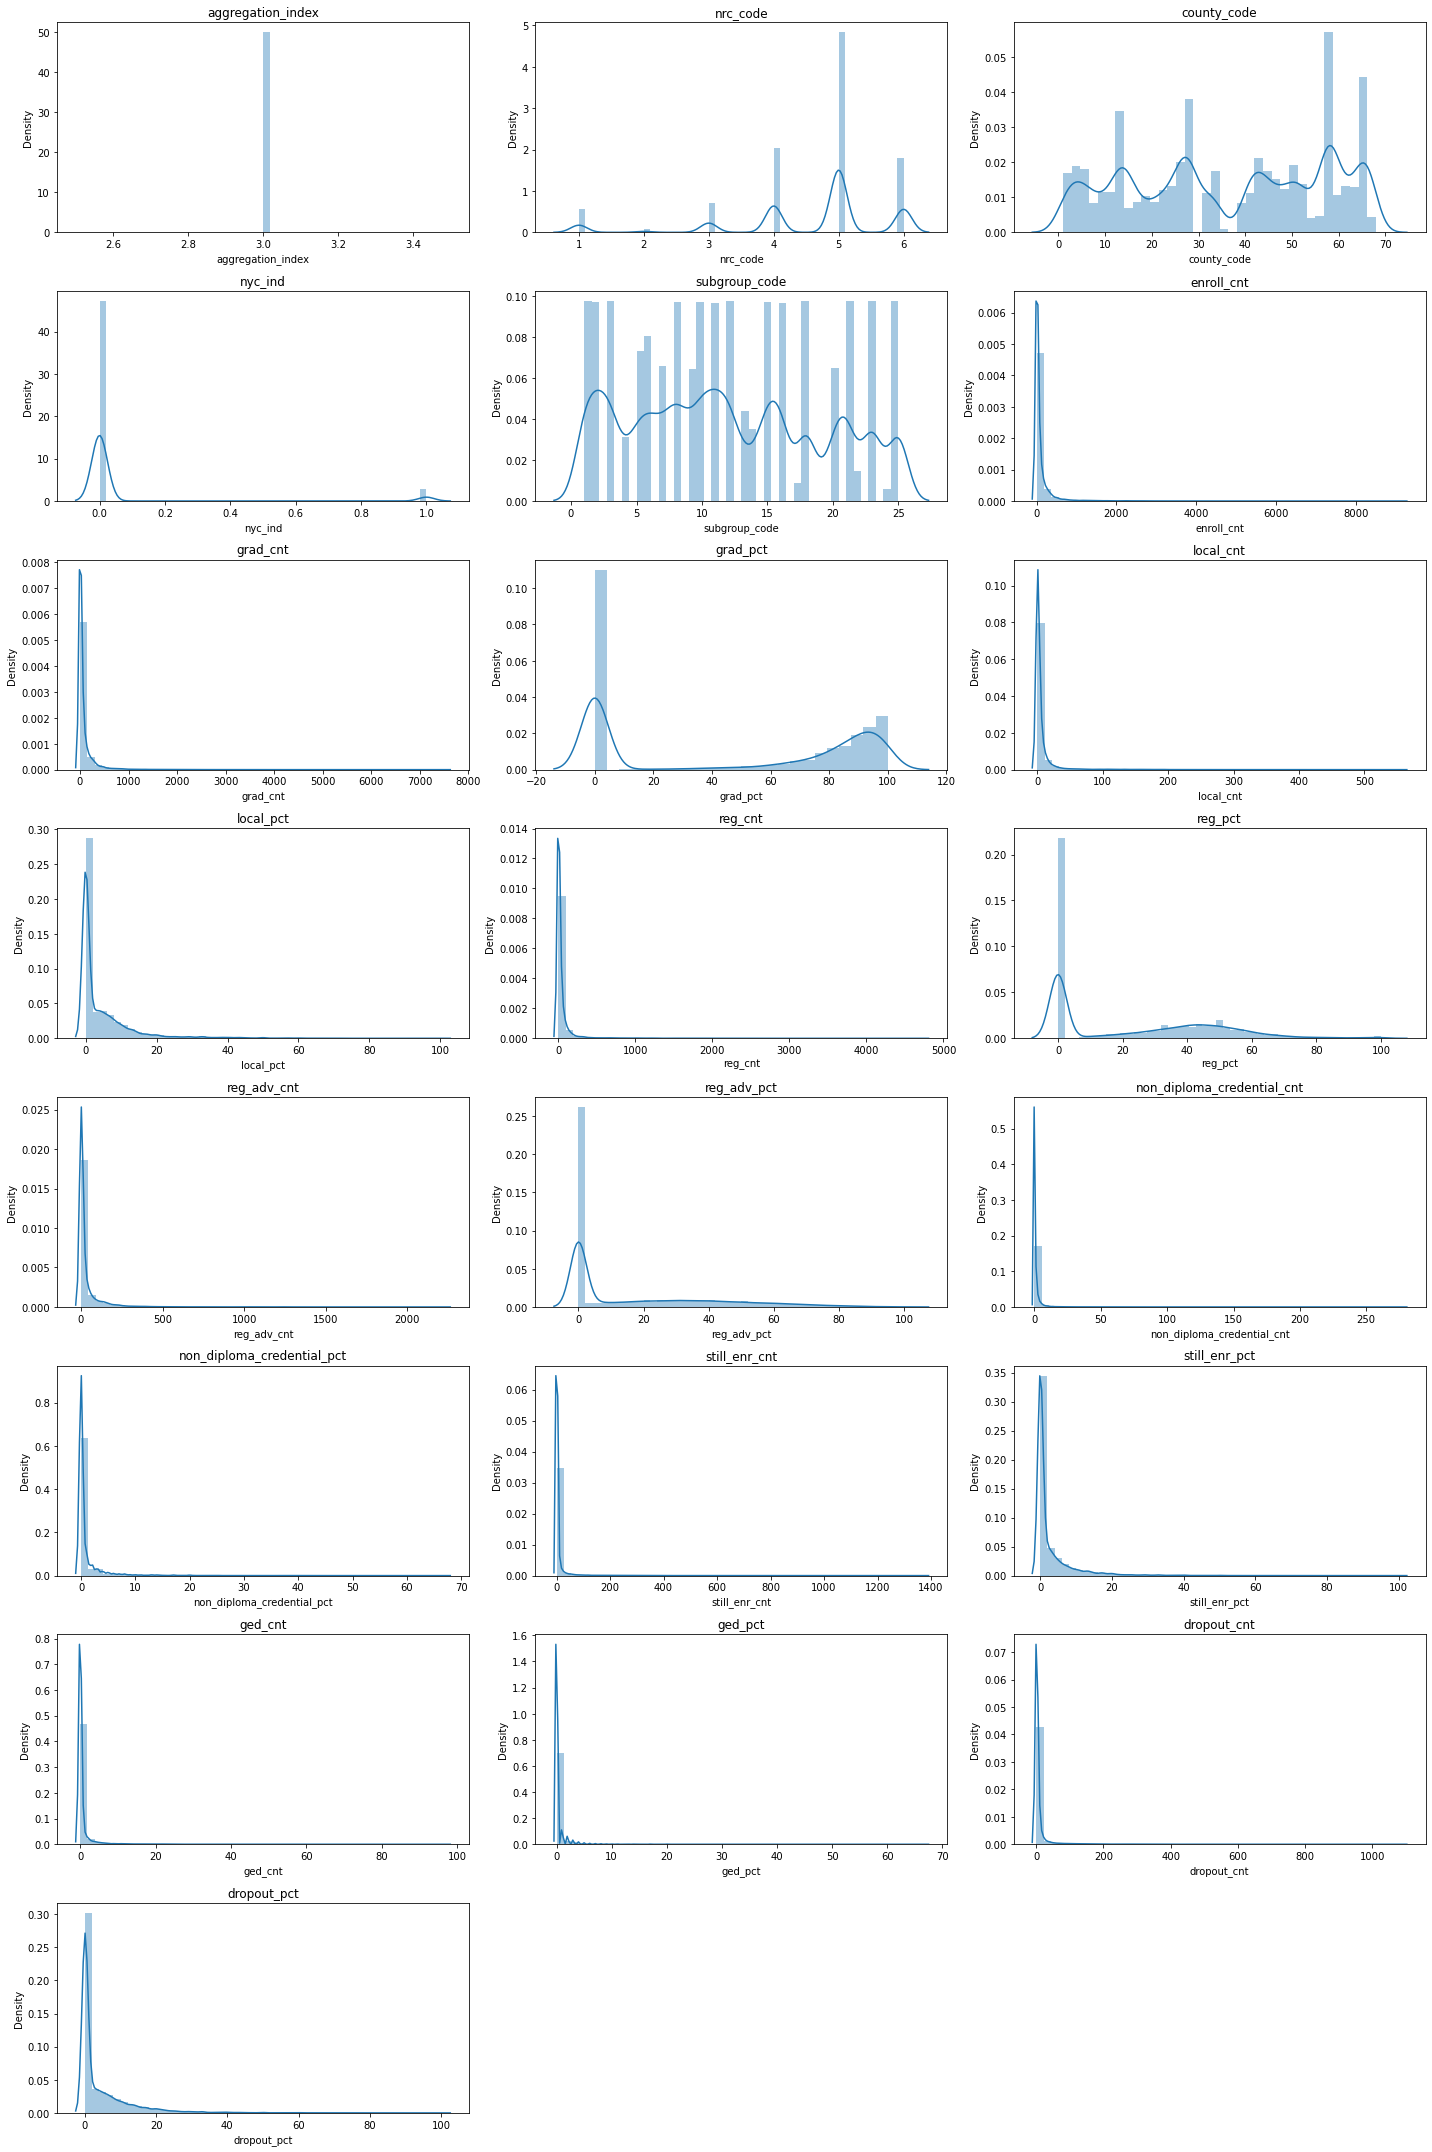

In [18]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,30))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.distplot(data[col],label=col,kde=True)
    plt.tight_layout()
    plt.title(col)

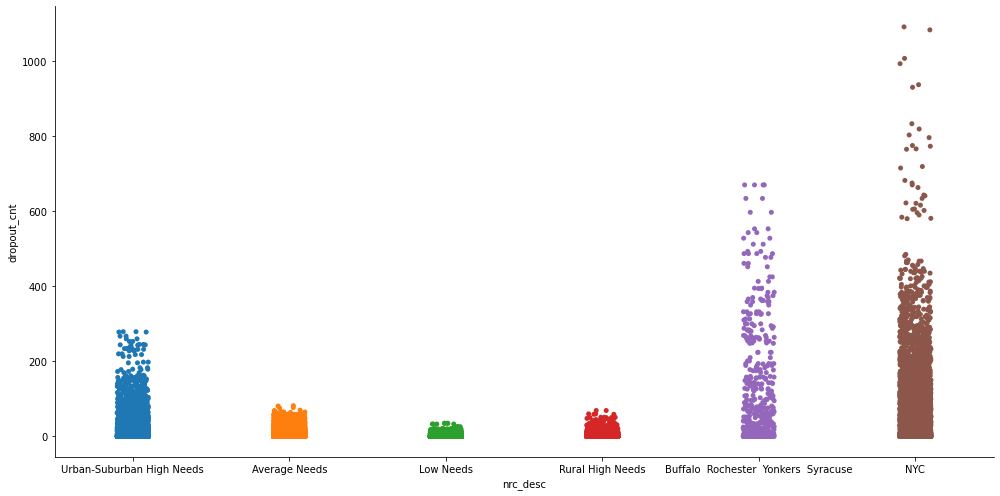

In [19]:
sns.catplot(data = data, x = 'nrc_desc',y = 'dropout_cnt',height = 7,aspect = 2)

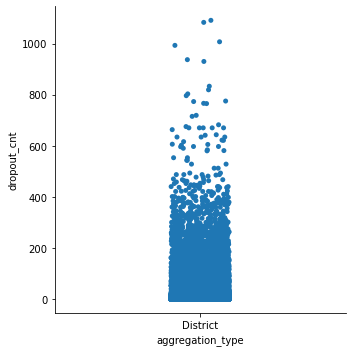

In [20]:
sns.catplot(data = data, x = 'aggregation_type',y = 'dropout_cnt')

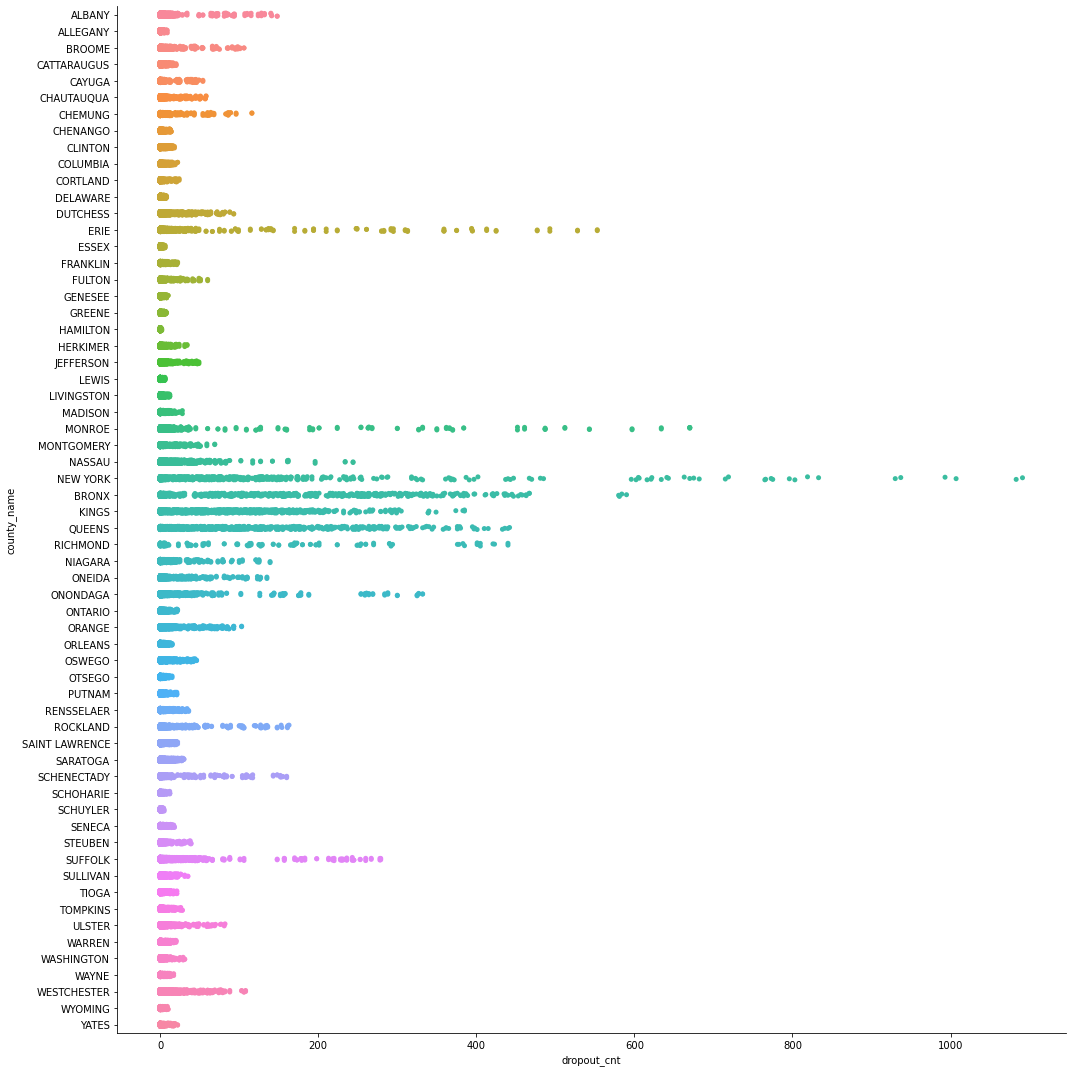

In [21]:
sns.catplot(data = data, x = 'dropout_cnt',y = 'county_name',height = 15,aspect = 1)

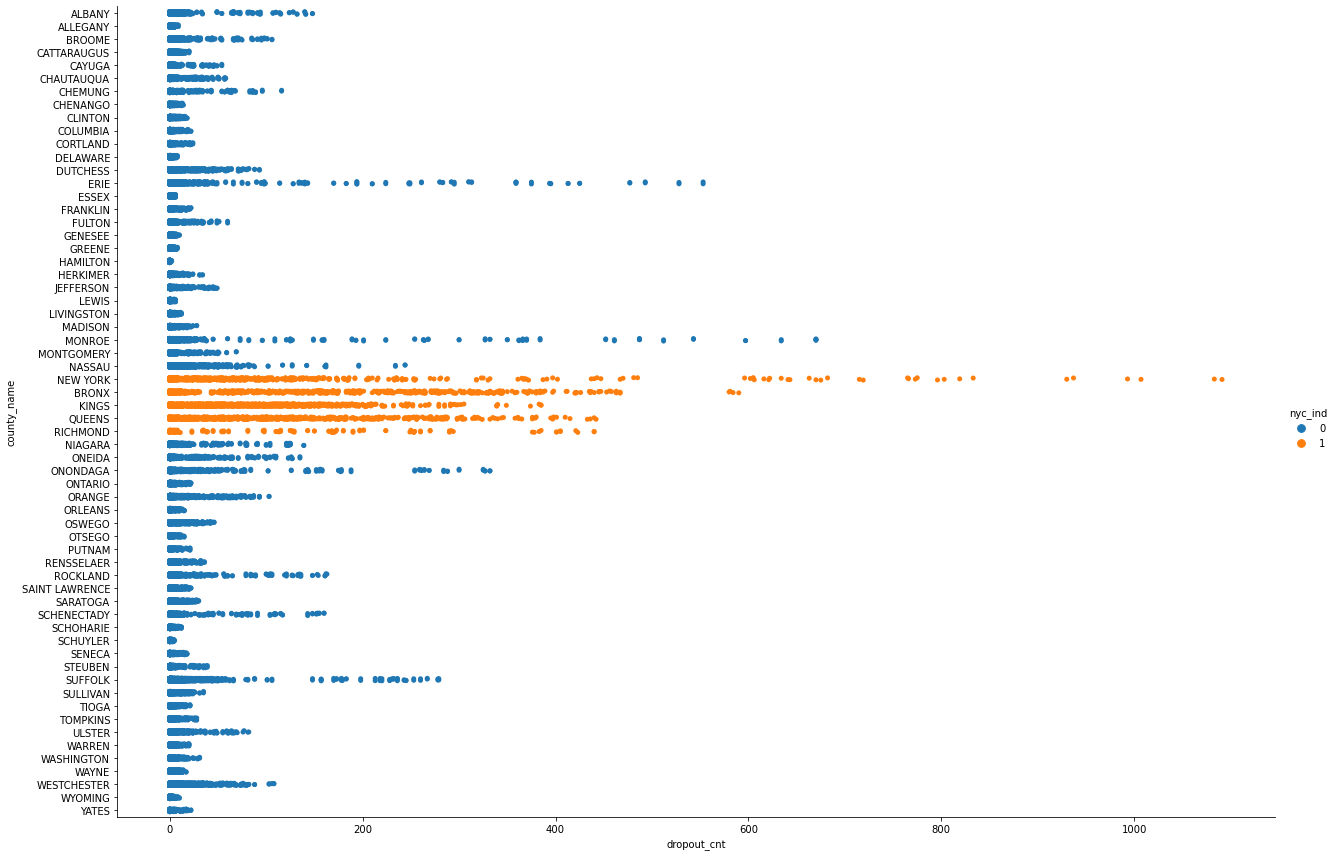

In [22]:
sns.catplot(data = data, x = 'dropout_cnt',y = 'county_name',hue = 'nyc_ind',height = 12,aspect = 1.5)

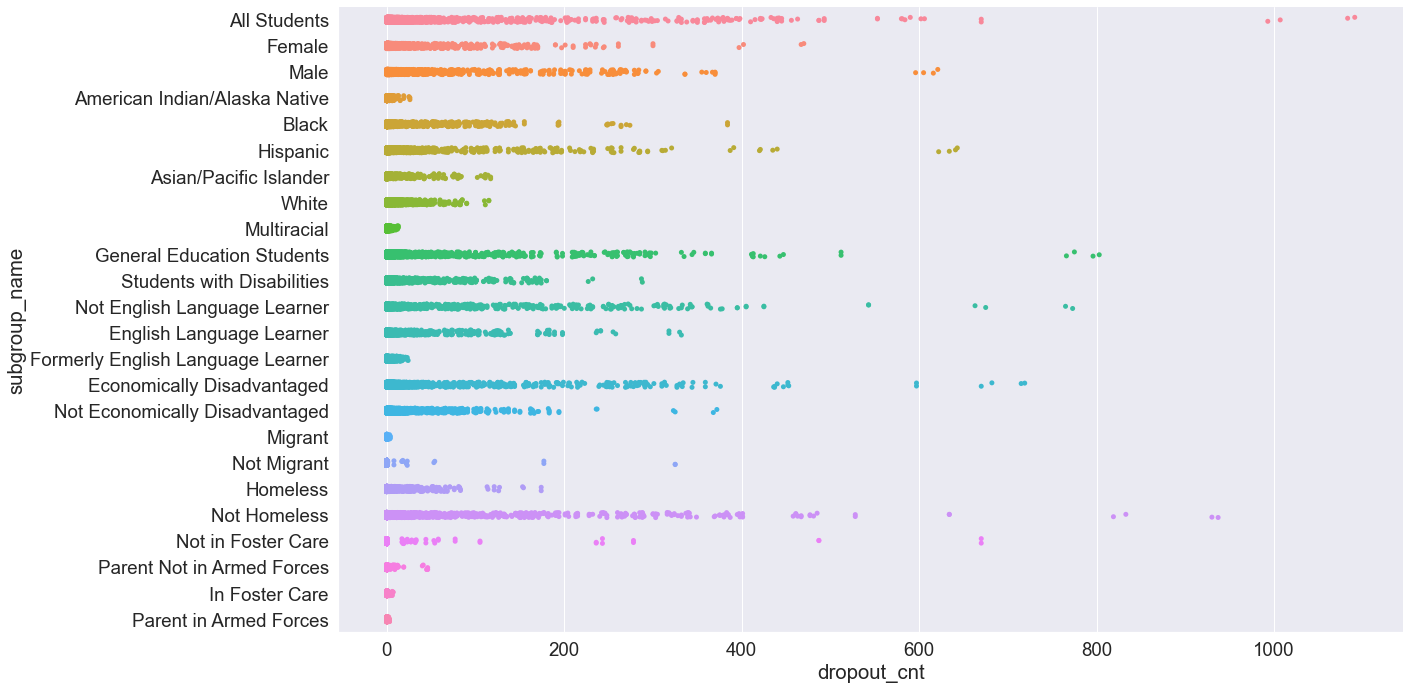

In [23]:
sns.set(font_scale = 1.7)
sns.catplot(data = data, x = 'dropout_cnt',y = 'subgroup_name',height = 10,aspect = 2)

In [24]:
data.corr()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
aggregation_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nrc_code,NaN,1.000000,0.155944,-0.721116,-0.001332,-0.370565,-0.336467,-0.034387,-0.429640,-0.133733,...,-0.156041,0.165406,-0.317492,-0.074809,-0.388245,-0.219711,-0.378202,-0.097500,-0.445615,-0.311863
county_code,NaN,0.155944,1.000000,-0.041471,-0.003399,0.001552,0.006957,0.034183,-0.006407,0.019055,...,0.008331,0.006825,-0.025674,-0.035170,-0.009311,0.013924,-0.030112,-0.013567,-0.023348,-0.009952
nyc_ind,NaN,-0.721116,-0.041471,1.000000,-0.012789,0.478901,0.454320,0.088602,0.495446,0.087009,...,0.298201,-0.048415,0.368042,0.024688,0.452959,0.203824,0.452496,0.091765,0.481883,0.198903
subgroup_code,NaN,-0.001332,-0.003399,-0.012789,1.000000,-0.118748,-0.124014,-0.487166,-0.097771,-0.174478,...,-0.139547,-0.399670,-0.078376,-0.097644,-0.066463,-0.125261,-0.071778,-0.081408,-0.078063,-0.153404
enroll_cnt,NaN,-0.370565,0.001552,0.478901,-0.118748,1.000000,0.994110,0.269610,0.842651,0.064326,...,0.850731,0.192175,0.536194,0.003155,0.771267,0.134991,0.820073,0.079630,0.853826,0.156408
grad_cnt,NaN,-0.336467,0.006957,0.454320,-0.124014,0.994110,1.000000,0.287364,0.805355,0.050713,...,0.889396,0.227316,0.506151,-0.005699,0.720122,0.106473,0.790297,0.069509,0.806139,0.125488
grad_pct,NaN,-0.034387,0.034183,0.088602,-0.487166,0.269610,0.287364,1.000000,0.205908,0.397227,...,0.332443,0.784638,0.150502,0.173044,0.129784,0.184075,0.146829,0.135805,0.157069,0.291551
local_cnt,NaN,-0.429640,-0.006407,0.495446,-0.097771,0.842651,0.805355,0.205908,1.000000,0.217713,...,0.556316,0.043863,0.606899,0.061850,0.713567,0.186108,0.776500,0.097173,0.877363,0.237296
local_pct,NaN,-0.133733,0.019055,0.087009,-0.174478,0.064326,0.050713,0.397227,0.217713,1.000000,...,-0.012666,0.012773,0.148227,0.393426,0.084003,0.300585,0.072139,0.133485,0.107574,0.391219


<AxesSubplot:>

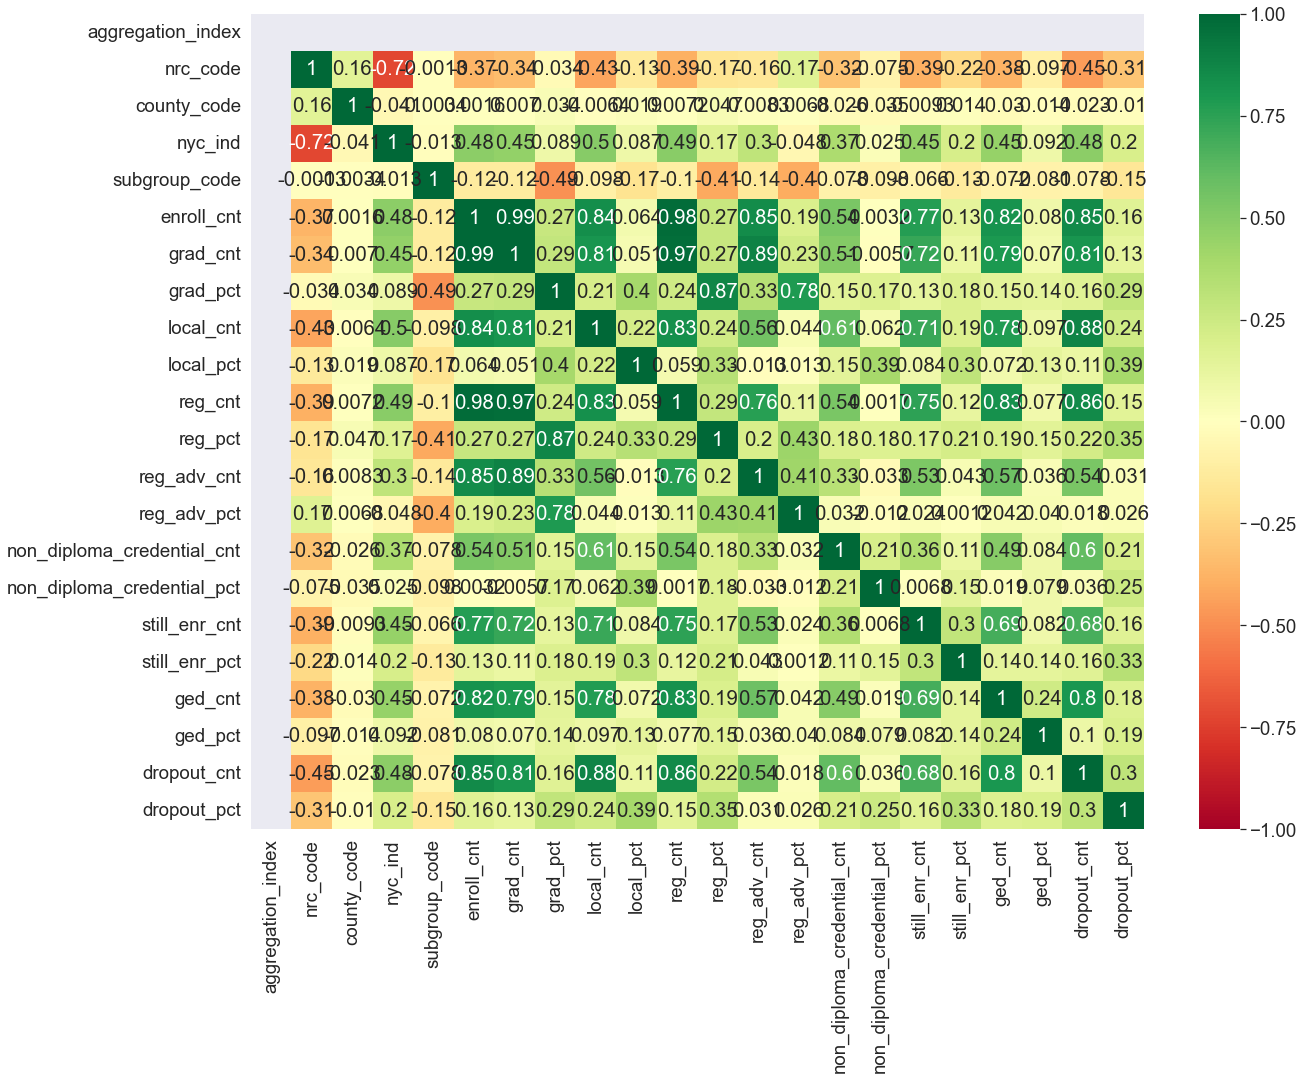

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True)

__Correlation between the dropout_cnt(response variable) and explanatory variables:__
- Dropout_cnt has `strong positive correlation` with `enroll_cnt, grad_cnt, local_cnt, reg_cnt, ged_cnt variables`. The correlation value is `greater than 0.80`
- Dropout_cnt has `mild positive correlation` with `nyc_id, reg_adv_cnt, non_diploma_credential_cnt and still_enr_cnt`. The correlation value here lies `between 0.40 and 0.80`

__Very strong correlation between explanatory variables:__
- enroll_cnt vs grad_cnt
- enroll_cnt vs reg_cnt
- grad_cnt vs reg_cnt

In [26]:
#considering explanatory variables with good correlation and doing regression plot
var = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'ged_cnt',
       'nyc_ind', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt']

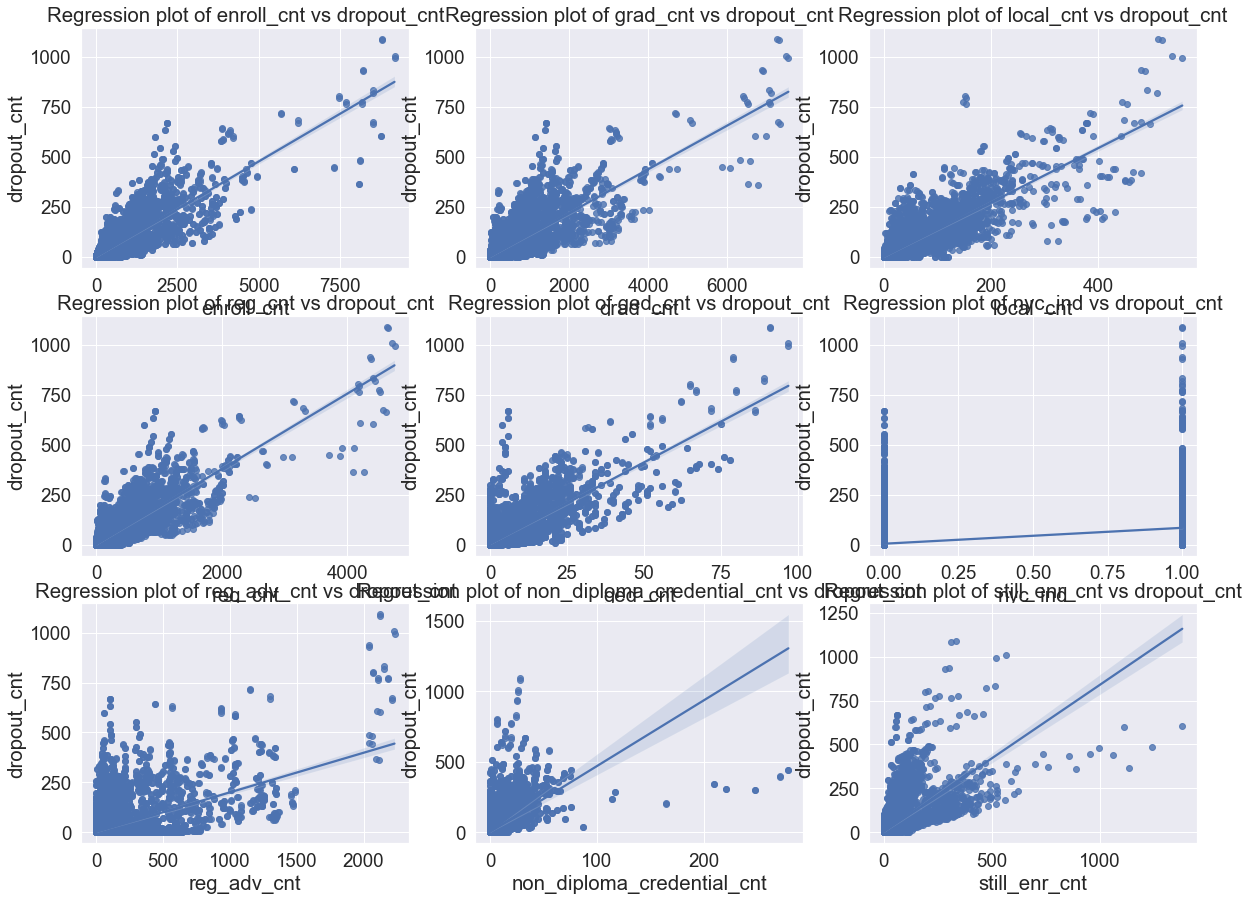

In [27]:
plt.figure(figsize=(20,15))
for i,v in enumerate(var):
    plt.subplot(math.ceil(len(var)/3),3,i+1)
    sns.regplot(x=v, y="dropout_cnt",data = data).set(title=f'Regression plot of {v} vs dropout_cnt')
    #plt.tight_layout()

### Data Preparation and Dimensionality reduction:

Now let's prepare the data and reduce the dimensions using different techniques

In [28]:
#check columns
data.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

Data has count and percentage columns here which provides the same information. Better to get rid of the percentages column

It is very important to get rid of the dropout percentage column because it provides the same information as dropout count. This would be a good model as it would avoid leaking the information of the response variable while training and testing the data

In [29]:
#filter the columns with variables having "_pct" in it
col1 = list(data.filter(like = '_pct', axis = 1).columns)

In [30]:
col1

['grad_pct',
 'local_pct',
 'reg_pct',
 'reg_adv_pct',
 'non_diploma_credential_pct',
 'still_enr_pct',
 'ged_pct',
 'dropout_pct']

In [31]:
#assign the data without col1 columns in it
df1 = data.iloc[:,~data.columns.isin(col1)]

In [32]:
#check the shape
df1.shape

(73152, 21)

Now remove the columns with very strong correlation with each other. In our case we have enroll_cnt, grad_cnt and reg_cnt having very strong positive relationship of more than 97% and is providing almost same information

In [33]:
#assign the strong correlated columns to col2
col2 = ['grad_cnt','reg_cnt']

In [34]:
#assign the data without col2 columns in it
df2 = df1.iloc[:,~df1.columns.isin(col2)]

In [35]:
df2.shape

(73152, 19)

In [36]:
df2

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,63,91,16,30,0,148
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,30,47,2,11,0,65
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,33,44,14,19,0,83
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,0,0,0,0,0,0,0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,42,23,10,18,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,Not Migrant,0,0,0,0,0,0,0
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,Homeless,0,0,0,0,0,0,0
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,Not Homeless,0,0,0,0,0,0,0
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,Not in Foster Care,0,0,0,0,0,0,0


We can now get rid of:
- report_school_year, as the data is only for 2018-19 and is not adding any value
- aggregation_index and aggregation_type, as it has only 1 type "District"
- aggregation_name and county_name, as the same information can be captured from county_code
- nrc_desc, as we have nrc_code
- subgroup_name, as it has its information captured in subgroup_code

It is wise to keep data in numeric form

In [37]:
#assign the above mentioned columns to col3
col3 = ['report_school_year','aggregation_index','aggregation_type','aggregation_name','county_name',
       'nrc_desc', 'subgroup_name']
df3 = df2.iloc[:,~df2.columns.isin(col3)]
df3.shape

(73152, 12)

In [38]:
df3

,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,63,91,16,30,0,148
1,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,30,47,2,11,0,65
2,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,33,44,14,19,0,83
3,3,1,0,2013 Total Cohort - 6 Year Outcome,4,0,0,0,0,0,0,0
4,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,42,23,10,18,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...
73147,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,0,0,0,0,0,0,0
73148,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,0,0,0,0,0,0,0
73149,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,0,0,0,0,0,0,0
73150,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,0,0,0,0,0,0,0


Applying the domain knowledge, we have the reduced the dimensions from 29 to 12 without losing anything important. One can use the feature selecting methods for the dimensionality reduction but in this case, applying domain knowledge is best option

Many columns showing counts has all values 0 and makes no sense to keep those in our study. Let's assign the values with all values not zero to a new variable. This gives us around 40,000 observations

In [39]:
df3.iloc[:,5:]

,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,658,63,91,16,30,0,148
1,324,30,47,2,11,0,65
2,334,33,44,14,19,0,83
3,0,0,0,0,0,0,0
4,367,42,23,10,18,0,91
...,...,...,...,...,...,...,...
73147,0,0,0,0,0,0,0
73148,0,0,0,0,0,0,0
73149,0,0,0,0,0,0,0
73150,0,0,0,0,0,0,0


In [40]:
#assign the data with no all values zero to new variable and reset the index
df4 = df3.loc[(df3.iloc[:,5:].T!=0).any()]
df4 = df4.reset_index(drop=True)
df4

,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,63,91,16,30,0,148
1,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,30,47,2,11,0,65
2,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,33,44,14,19,0,83
3,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,42,23,10,18,0,91
4,3,1,0,2013 Total Cohort - 6 Year Outcome,6,98,13,5,4,8,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
39669,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,3,36,2,3,1,1,0,9
39670,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,10,48,3,8,0,0,0,5
39671,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,11,13,0,0,3,2,0,6
39672,4,68,0,2013 Total Cohort - 6 Year Outcome - August 2019,15,33,0,3,3,0,0,7


Data consists of column membership_desc which provides in which year the student was enrolled in. It also provides the information of how many years the students is enrolled in

We can take the total years enrolled in high school information by splitting the string and adding a new column

After that we can get rid of the membership_desc column

In [41]:
df4['membership_desc'].head(10)

0    2013 Total Cohort - 6 Year Outcome
1    2013 Total Cohort - 6 Year Outcome
2    2013 Total Cohort - 6 Year Outcome
3    2013 Total Cohort - 6 Year Outcome
4    2013 Total Cohort - 6 Year Outcome
5    2013 Total Cohort - 6 Year Outcome
6    2013 Total Cohort - 6 Year Outcome
7    2013 Total Cohort - 6 Year Outcome
8    2013 Total Cohort - 6 Year Outcome
9    2013 Total Cohort - 6 Year Outcome
Name: membership_desc, dtype: object

In [42]:
#retrieve the total years from the membership_desc column and append it into new list
total_years=[]
for i in range(len(df4)):
    total_years.append(int(df4['membership_desc'][i].split(" ")[4]))

total_years

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,


In [43]:
#insert the with total years to index 3
df4.insert(3,"total_years",total_years)

In [44]:
#drop the column membership_desc and assign the data to df
df = df4.drop(['membership_desc'],axis = 1)
df

,nrc_code,county_code,nyc_ind,total_years,subgroup_code,enroll_cnt,local_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,3,1,0,6,1,658,63,91,16,30,0,148
1,3,1,0,6,2,324,30,47,2,11,0,65
2,3,1,0,6,3,334,33,44,14,19,0,83
3,3,1,0,6,5,367,42,23,10,18,0,91
4,3,1,0,6,6,98,13,5,4,8,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
39669,4,68,0,6,3,36,2,3,1,1,0,9
39670,4,68,0,6,10,48,3,8,0,0,0,5
39671,4,68,0,6,11,13,0,0,3,2,0,6
39672,4,68,0,6,15,33,0,3,3,0,0,7


df is our final data and this is prepared with around 40,000 observations now with dimensions reduced to 12. It is a ready to go data for creating the model

### Regression models:

This is a count based data and non-negative integers. For count based data, Poisson regression model or negative binomial regression model are the best ones, and, using linear regression would not make much sense. Let's construct 6 models here:
- 2 for Poisson regression
- 2 for negative regression and
- 2 for multilinear regression

At the end we will compare all the models and see which model worked best for us